# fun with numerical methods and pytorch



In [64]:
%env HSA_OVERRIDE_GFX_VERSION=11.0.0


env: HSA_OVERRIDE_GFX_VERSION=11.0.0


In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    print("CUDA is available. Running on GPU.")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is available. Running on GPU.


Epoch 0, Loss: 1.5956950187683105
Epoch 1000, Loss: 0.039295315742492676
Epoch 2000, Loss: 0.12294798344373703
Epoch 3000, Loss: 0.14344024658203125
Epoch 4000, Loss: 0.1787095069885254
Epoch 5000, Loss: 0.19640104472637177
Epoch 6000, Loss: 0.20703135430812836
Epoch 7000, Loss: 0.21409961581230164
Epoch 8000, Loss: 0.21762563288211823
Epoch 9000, Loss: 0.06035555526614189


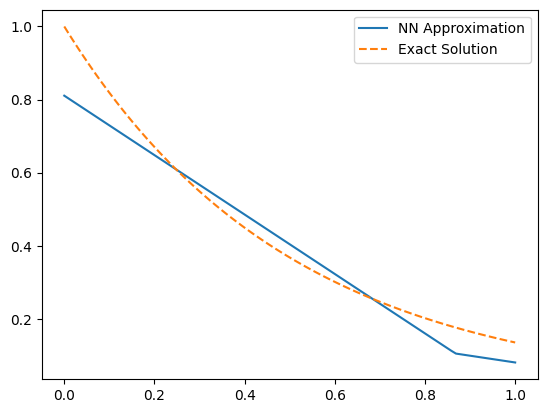

In [66]:
# Define the neural network
class NeuralODE(nn.Module):
    def __init__(self):
        super(NeuralODE, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)
    
    def forward(self, t):
        x = torch.relu(self.fc1(t))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the ODE residual (dy/dt + 2y = 0)
def ode_residual(model, t):
    y = model(t)
    y_t = torch.autograd.grad(y, t, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    return y_t + 2 * y

# Training loop
def train(model, optimizer, epochs=10000):
    t = torch.linspace(0.0, 1.0, 100).view(-1, 1)  # Time steps
    t.requires_grad = True  # Allow gradient computation for time
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Compute the residual
        residual = ode_residual(model, t)
        
        # Boundary condition: y(0) = 1
        boundary_loss = (model(torch.tensor([[0.0]])) - 1)**2
        
        # Loss: sum of residuals + boundary condition
        loss = torch.mean(residual**2) + boundary_loss
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Initialize and train the model
model = NeuralODE()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train(model, optimizer)

# Plot the result
t_plot = torch.linspace(0.0, 1.0, 100).view(-1, 1)
y_pred = model(t_plot).detach().numpy()
y_exact = np.exp(-2 * t_plot.numpy())

plt.plot(t_plot.numpy(), y_pred, label='NN Approximation')
plt.plot(t_plot.numpy(), y_exact, label='Exact Solution', linestyle='--')
plt.legend()
plt.show()


Epoch 0, Loss: 1.1776236295700073
Epoch 1000, Loss: 0.017986569553613663
Epoch 2000, Loss: 0.16447561979293823
Epoch 3000, Loss: 0.19284164905548096
Epoch 4000, Loss: 0.207028329372406
Epoch 5000, Loss: 0.2140980064868927
Epoch 6000, Loss: 0.2246583104133606
Epoch 7000, Loss: 0.2246582955121994
Epoch 8000, Loss: 0.2246660441160202
Epoch 9000, Loss: 0.22466102242469788


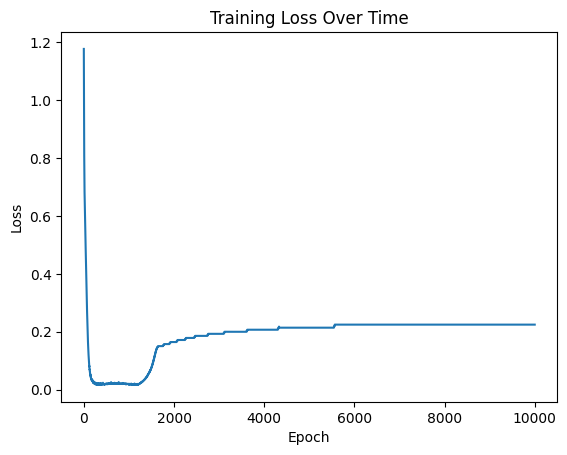

In [67]:
import matplotlib.pyplot as plt

# Modified training loop to store loss values
def train(model, optimizer, epochs=10000):
    t = torch.linspace(0.0, 1.0, 100).view(-1, 1)  # Time steps
    t.requires_grad = True  # Allow gradient computation for time
    losses = []  # Store the loss values for plotting
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Compute the residual
        residual = ode_residual(model, t)
        
        # Boundary condition: y(0) = 1
        boundary_loss = (model(torch.tensor([[0.0]])) - 1)**2
        
        # Loss: sum of residuals + boundary condition
        loss = torch.mean(residual**2) + boundary_loss
        loss.backward()
        optimizer.step()

        # Store the loss value
        losses.append(loss.item())

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    # Plot the loss curve
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.show()

# Initialize and train the model
model = NeuralODE()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train(model, optimizer)


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 64) # Second hidden layer
        self.fc3 = nn.Linear(64, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation
        x = torch.relu(self.fc2(x))  # ReLU activation
        x = self.fc3(x)  # No activation for the output layer
        return x

# Initialize the model
model = SimpleNN()


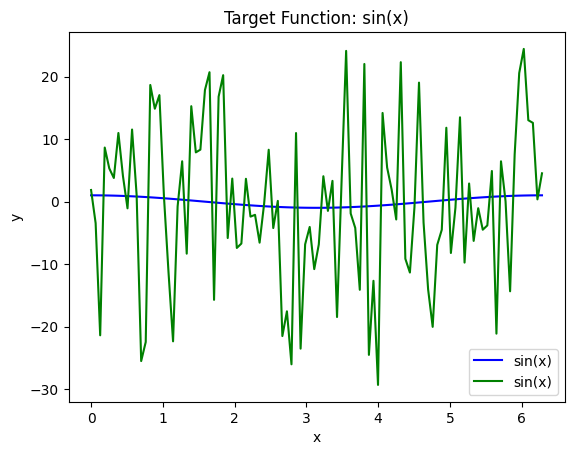

In [ ]:
# Generate x data
x_data = torch.linspace(0, 2 * torch.pi, 100).view(-1, 1)  # 100 points in range [0, 2π]

# Generate y data as sin(x)
y_data = torch.sin(x_data)

# Add Gaussian noise to the y_data (more variance)
noise_std = 11.9  # Standard deviation of the noise
y_data_noisy = y_data + torch.randn_like(y_data) * noise_std

# Visualize the target function (sin(x))
plt.plot(x_data.numpy(), y_data.numpy(), label='sin(x)', color='blue')
plt.plot(x_data.numpy(), y_data_noisy.numpy(), label='sin(x)', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target Function: sin(x)')
plt.legend()
plt.show()


In [70]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


Epoch [0/500], Loss: 0.5658315420150757


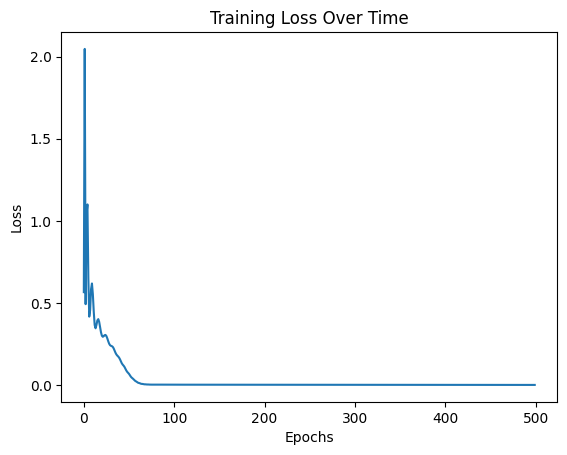

In [71]:
# Training the neural network
epochs = 500
losses = []

for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass: get predictions
    y_pred = model(x_data)

    # Compute the loss
    loss = criterion(y_pred, y_data)
    
    # Backpropagation
    loss.backward()
    optimizer.step()

    # Store the loss value for plotting
    losses.append(loss.item())

    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item()}")

# Plot the loss curve
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


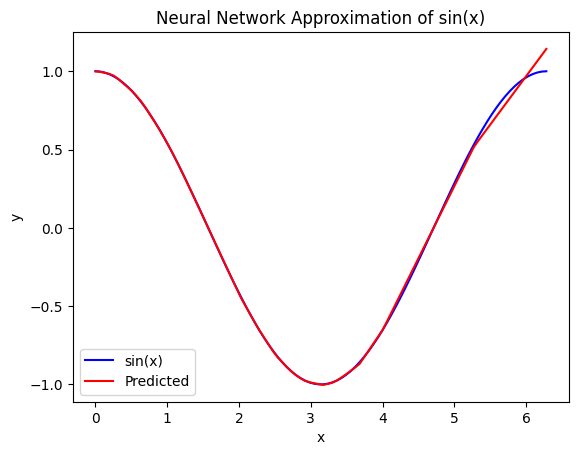

In [72]:
# Visualize the predicted vs actual sin(x) function
with torch.no_grad():
    y_pred = model(x_data)  # Get predictions without computing gradients

plt.plot(x_data.numpy(), y_data.numpy(), label='sin(x)', color='blue')  # Actual function
plt.plot(x_data.numpy(), y_pred.numpy(), label='Predicted', color='red')  # Neural network approximation
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Approximation of sin(x)')
plt.legend()
plt.show()
